In [5]:
import scanpy 
import numpy as np
import pandas as pd

from anndata import AnnData

[data](https://singlecell.broadinstitute.org/single_cell/study/SCP1038/the-human-and-mouse-enteric-nervous-system-at-single-cell-resolution?label=PEMN_1&cluster=hli.tsne2.txt&spatialGroups=--&annotation=LABEL--group--cluster&subsample=100000#study-download)

In [6]:
ls data

AtlasFullLength_log2TPM.txt*          msi.genes.tsv
all.meta.txt                          msi.neur.barcodes.tsv
atlas_metadata.txt                    msi.neur.genes.tsv
gene_sorted-msi.matrix.mtx            processed/
gene_sorted-msi.neur.matrix.mtx       regional_cell_sampling_UMIcounts.txt*
msi.barcodes.tsv


# convert to h5ad

In [7]:
# gene_sorted-msi.matrix.mtx	Mouse ileum all cells (10X) data 
gc_all = scanpy.read_mtx("data/gene_sorted-msi.matrix.mtx")

In [8]:
genes_all = pd.read_csv("data/msi.genes.tsv", sep=';', header=None)
bc_all = pd.read_csv("data/msi.barcodes.tsv", sep=';',  header=None)

In [9]:
gc_all = gc_all.T

In [10]:
gc_all.X

<79293x22595 sparse matrix of type '<class 'numpy.float32'>'
	with 135097215 stored elements in Compressed Sparse Column format>

In [11]:
gc_all.obs = bc_all
gc_all.var = genes_all

In [12]:
gc_neur = scanpy.read_mtx("data/gene_sorted-msi.neur.matrix.mtx")
bc_neur = pd.read_csv("data/msi.neur.barcodes.tsv", sep=';',  header=None)
genes_neur = pd.read_csv("data/msi.neur.genes.tsv", sep=';',  header=None)


In [13]:
gc_neur = gc_neur.T

In [14]:
gc_neur.obs

""
0
1
2
3
4
...
468
469
470
471


In [15]:
gc_neur.obs = bc_neur
gc_neur.var = genes_neur

In [16]:
gc_neur.var

,0
0,0610007P14Rik
1,0610009B22Rik
2,0610009O20Rik
3,0610010F05Rik
4,0610012G03Rik
...,...
13857,mt-Nd3
13858,mt-Nd4
13859,mt-Nd4l
13860,mt-Nd5


In [17]:
gc_neur.var

,0
0,0610007P14Rik
1,0610009B22Rik
2,0610009O20Rik
3,0610010F05Rik
4,0610012G03Rik
...,...
13857,mt-Nd3
13858,mt-Nd4
13859,mt-Nd4l
13860,mt-Nd5


In [18]:
gc_neur

AnnData object with n_obs × n_vars = 473 × 13862
    obs: 0
    var: 0

In [19]:
gc_all

AnnData object with n_obs × n_vars = 79293 × 22595
    obs: 0
    var: 0

In [20]:
gc_all.obs

,0
0,M1_S3.GTAGATCTCGCTACAA
1,M1_S3.ATGACCACAGTCAGAG
2,M1_S3.TCATGTTGTAACTAAG
3,M1_S3.CATTGCCCAGAGATGC
4,M1_S3.TTCCTAATCACTCGAA
...,...
79288,M7_S28.CCCTAACAGTCGAAAT
79289,M7_S28.TCTACCGCACGTGAGA
79290,M7_S28.CATTGAGGTTCGGCGT
79291,M7_S28.GTATTGGTCGGCATTA


In [21]:
meta = pd.read_csv("data/all.meta.txt", sep='\t')

/var/folders/l_/4y7k2l0d579628286_0qftx00000gn/T/ipykernel_44752/4005217905.py:1: DtypeWarning: Columns (1,4,5,7,9,11,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv("data/all.meta.txt", sep='\t')


In [22]:
meta

,NAME,Age,Annotation,Dataset,Location_ID,Mouse_ID,Overload,Patient_ID,Region,Segment,Sex,Time,Type,Unique_ID,nGene,nUMI
0,TYPE,group,group,group,group,group,group,group,group,group,group,group,group,group,numeric,numeric
1,H10_S46.GGAACTTCAAGAAGAG,35,Fibroblast_2,Human colon all cells (10X),Sigmoid,NaN,1X,H10,Myenteric,NaN,M,NaN,NaN,S46,1166,1563
2,H10_S46.CCGTACTCACCTCGGA,35,Epithelial,Human colon all cells (10X),Sigmoid,NaN,1X,H10,Myenteric,NaN,M,NaN,NaN,S46,1554,2061
3,H10_S46.GATGCTAAGAGCAATT,35,Fibroblast_1,Human colon all cells (10X),Sigmoid,NaN,1X,H10,Myenteric,NaN,M,NaN,NaN,S46,1335,1760
4,H10_S46.CCCAGTTAGGGATCTG,35,Myocyte_3,Human colon all cells (10X),Sigmoid,NaN,1X,H10,Myenteric,NaN,M,NaN,NaN,S46,1008,1367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586456,M29_S102.S322,NaN,Glia_1,Mouse colon enteric glia (Smart-Seq2),NaN,M29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S102,3907,867952.13
586457,M29_S102.S362,NaN,Glia_2,Mouse colon enteric glia (Smart-Seq2),NaN,M29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S102,4363,523014.0
586458,M29_S102.S351,NaN,Glia_1,Mouse colon enteric glia (Smart-Seq2),NaN,M29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S102,4967,710717.01
586459,M29_S102.S294,NaN,Glia_2,Mouse colon enteric glia (Smart-Seq2),NaN,M29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S102,5090,715224.94


In [23]:
meta['Dataset'].value_counts()  

Dataset
Mouse colon all cells (10X)                 343000
Human colon all cells (10X)                 146442
Mouse ileum all cells (10X)                  79293
Human colon enteric glia (10X)                6054
Mouse colon enteric glia (Smart-Seq2)         3039
Mouse colon enteric neurons (Smart-Seq2)      2657
Mouse colon enteric neurons (10X)             1938
Mouse colon enteric glia (10X)                1690
Human colon enteric neurons (10X)             1445
Mouse ileum enteric neurons (10X)              473
Mouse ileum enteric glia (10X)                 429
group                                            1
Name: count, dtype: int64

In [ ]:
meta = pd.read_csv("data/all.meta.txt", sep='\t')
meta[meta['Dataset'] == "Mouse ileum enteric neurons (10X)"]

,NAME,Age,Annotation,Dataset,Location_ID,Mouse_ID,Overload,Patient_ID,Region,Segment,Sex,Time,Type,Unique_ID,nGene,nUMI
570181,M1_S3.GACCAATGTTCTCTAT,NaN,PEMN_1,Mouse ileum enteric neurons (10X),NaN,M1,2x,NaN,ileum,NaN,F,NaN,NaN,S3,2027,3977.0
570182,M1_S4.ACGATCAAGTGGAAAG,NaN,PSN_1,Mouse ileum enteric neurons (10X),NaN,M1,4x,NaN,ileum,NaN,F,NaN,NaN,S4,1601,3271.0
570183,M1_S4.CTGATCCCACAAGCAG,NaN,PEMN_1,Mouse ileum enteric neurons (10X),NaN,M1,4x,NaN,ileum,NaN,F,NaN,NaN,S4,1307,2178.0
570184,M1_S3.ACGTCCTAGGATTTAG,NaN,PEMN_1,Mouse ileum enteric neurons (10X),NaN,M1,2x,NaN,ileum,NaN,F,NaN,NaN,S3,1572,2906.0
570185,M1_S4.AGGTTGTAGCACGATG,NaN,PSN_1,Mouse ileum enteric neurons (10X),NaN,M1,4x,NaN,ileum,NaN,F,NaN,NaN,S4,1839,3825.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570649,M7_S27.TGGGAGATCTTCCACG,NaN,PSN_2,Mouse ileum enteric neurons (10X),NaN,M7,4x,NaN,ileum,NaN,F,NaN,NaN,S27,2546,6034.0
570650,M7_S27.CATAAGCCACTCCGAG,NaN,PEMN_1,Mouse ileum enteric neurons (10X),NaN,M7,4x,NaN,ileum,NaN,F,NaN,NaN,S27,2438,5650.0
570651,M7_S28.AAGTCGTGTCTTTCAT,NaN,PIMN_1,Mouse ileum enteric neurons (10X),NaN,M7,4x,NaN,ileum,NaN,F,NaN,NaN,S28,2122,4036.0
570652,M7_S28.TCATATCTCGACACCG,NaN,PSVN_1,Mouse ileum enteric neurons (10X),NaN,M7,4x,NaN,ileum,NaN,F,NaN,NaN,S28,4077,14052.0


In [26]:
meta['Annotation'].str.upper().str.contains("NEURON").sum()

np.int64(5092)

# Epithelial cells


In [27]:
ep_all = pd.read_csv("data/AtlasFullLength_log2TPM.txt", sep='\t')

In [28]:
ep_all

,S634_Lgr5GFP_M7_GFPLow_Enterocyte,S745_Lgr5GFP_M7_GFPLow_Stem,S856_Lgr5GFP_M7_GFPLow_Stem,S967_Lgr5GFP_M7_GFPLow_Goblet,S1078_Lgr5GFP_M7_GFPLow_Goblet,S1189_Lgr5GFP_M7_GFPLow_TA,S1300_Lgr5GFP_M7_GFPLow_Enterocyte-Progenitor-Late,S1411_Lgr5GFP_M7_GFPLow_TA,S1522_Lgr5GFP_M7_GFPLow_TA,S111_Lgr5GFP_M7_GFPLow_Enterocyte,...,S570_WT_M3_GFP-.CD24-.EpCAM+_Tuft-2,S571_WT_M3_GFP-.CD24-.EpCAM+_Tuft-2,S572_WT_M3_GFP-.CD24-.EpCAM+_Tuft-1,S573_WT_M3_GFP-.CD24-.EpCAM+_Tuft-1,S574_WT_M3_GFP-.CD24-.EpCAM+_Tuft-1,S575_WT_M3_GFP-.CD24-.EpCAM+_Tuft-2,S576_WT_M3_GFP-.CD24-.EpCAM+_Tuft-1,S578_WT_M3_GFP-.CD24-.EpCAM+_Tuft-2,S579_WT_M3_GFP-.CD24-.EpCAM+_Tuft-2,S580_WT_M3_GFP-.CD24-.EpCAM+_Tuft-2
0610005C13Rik,6.712871,0.000000,3.320485,0.000000,5.698774,0.000000,6.819796,5.596935,0.000000,5.597233,...,6.285402,0.000000,6.516015,3.161888,0.000000,0.000000,0.000000,0.000000,0.000000,7.177519
0610007N19Rik,4.519164,6.159266,4.448901,6.090642,5.219169,6.503190,0.000000,3.410070,3.748461,0.000000,...,5.359662,4.555203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.689858,0.000000
0610007P14Rik,7.244221,0.000000,0.000000,7.736875,6.726423,6.226894,8.876977,7.811599,6.798439,4.945795,...,2.601697,8.473625,7.585714,0.000000,7.584436,7.560409,0.000000,0.000000,7.840526,6.558727
0610008F07Rik,3.263034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610009B14Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyx,3.669027,2.253989,0.000000,0.000000,0.000000,0.000000,3.116032,4.731726,0.000000,6.154413,...,0.000000,5.339137,0.000000,6.710806,0.000000,0.000000,1.959770,0.000000,0.000000,0.000000
Zzef1,5.819924,2.330558,3.950468,5.128871,4.134221,0.000000,4.639811,3.439623,0.000000,7.414558,...,3.972693,0.000000,0.000000,1.263034,0.000000,0.000000,0.000000,2.443607,3.763412,0.000000
Zzz3,0.000000,0.000000,0.641546,0.000000,4.034744,0.000000,0.000000,4.315421,3.874797,0.000000,...,0.000000,0.000000,2.232661,3.674687,0.000000,0.000000,4.765004,5.195348,3.026800,3.797013
a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
eo = pd.read_csv("data/regional_cell_sampling_UMIcounts.txt", sep='\t', index_col=0)

In [30]:
df = eo.copy()

In [31]:

# 2) If there's a 'GENE' column, make it the index
if "GENE" in df.columns:
    df = df.set_index("GENE")

# 3) Clean names and ensure strings
df.index = df.index.astype(str).str.strip()
df.columns = df.columns.astype(str).str.strip()

# 4) Coerce all expression values to numeric (non-numeric -> NaN -> 0)
expr = df.apply(pd.to_numeric, errors="coerce").fillna(0.0)

# 5) Build AnnData as cells × genes
X = expr.T.values.astype(np.float32)
adata = AnnData(X=X)

# Columns are cells -> obs; index are genes -> var
adata.obs_names = expr.columns        # cells
adata.var_names = expr.index   

In [32]:
adata.X.max()

np.float32(20299.0)

In [33]:
adata_ep = adata.copy()

In [34]:
adata_ep.var

""
GENE
Xkr4
Gm1992
Gm37381
Rp1
Rp1_ENSMUSG00000109048
...
AC168977.1
PISD
DHRSX


In [35]:
adata_ep.obs

""
AAACATACGTTACG_Ileum_m1_Goblet
AAACATACTATGGC_Ileum_m1_Enterocyte
AAACCGTGGTCCTC_Ileum_m1_Stem
AAACGCACTCTACT_Ileum_m1_TA
AAACGGCTCTTATC_Ileum_m1_Goblet
...
TTTCAGTGGTATGC_Jejunum_m2_Stem
TTTCAGTGTATGCG_Jejunum_m2_Goblet
TTTCGAACTCCTTA_Jejunum_m2_TA
TTTGACTGTTGCTT_Jejunum_m2_Enterocyte


In [36]:
gc_neur.var.rename(columns={0: 'GENE'}, inplace=True)

In [37]:
gc_neur.var = gc_neur.var.set_index('GENE')

In [38]:
gc_neur.obs

,0
0,M1_S3.GACCAATGTTCTCTAT
1,M1_S4.ACGATCAAGTGGAAAG
2,M1_S4.CTGATCCCACAAGCAG
3,M1_S3.ACGTCCTAGGATTTAG
4,M1_S4.AGGTTGTAGCACGATG
...,...
468,M7_S27.TGGGAGATCTTCCACG
469,M7_S27.CATAAGCCACTCCGAG
470,M7_S28.AAGTCGTGTCTTTCAT
471,M7_S28.TCATATCTCGACACCG


In [39]:
gc_neur.obs.set_index(0, inplace=True)

In [40]:
gc_neur.obs.rename(columns={0: ''}, inplace=True)

gc_neur.obs

""
0
M1_S3.GACCAATGTTCTCTAT
M1_S4.ACGATCAAGTGGAAAG
M1_S4.CTGATCCCACAAGCAG
M1_S3.ACGTCCTAGGATTTAG
M1_S4.AGGTTGTAGCACGATG
...
M7_S27.TGGGAGATCTTCCACG
M7_S27.CATAAGCCACTCCGAG
M7_S28.AAGTCGTGTCTTTCAT


In [41]:
gc_neur.obs.index

Index(['M1_S3.GACCAATGTTCTCTAT', 'M1_S4.ACGATCAAGTGGAAAG',
       'M1_S4.CTGATCCCACAAGCAG', 'M1_S3.ACGTCCTAGGATTTAG',
       'M1_S4.AGGTTGTAGCACGATG', 'M1_S3.TCATGTTCATCCGTGG',
       'M1_S4.CTAACCCTCTTTGCTA', 'M1_S3.GGAGATGGTTTACCAG',
       'M1_S4.ATGAAAGCACAACGAG', 'M1_S4.ATCACGAAGACCATTC',
       ...
       'M7_S27.ATCGATGAGTCGTCTA', 'M7_S27.TAACTTCCAACGGGTA',
       'M7_S28.TGGAGGAGTTGACTAC', 'M7_S27.AGATGAAAGCTCGTGC',
       'M7_S27.CATAGACTCCGCAACG', 'M7_S27.TGGGAGATCTTCCACG',
       'M7_S27.CATAAGCCACTCCGAG', 'M7_S28.AAGTCGTGTCTTTCAT',
       'M7_S28.TCATATCTCGACACCG', 'M7_S27.TGTGATGAGCCGCACT'],
      dtype='object', name=0, length=473)

In [42]:
gc_neur.obs

""
0
M1_S3.GACCAATGTTCTCTAT
M1_S4.ACGATCAAGTGGAAAG
M1_S4.CTGATCCCACAAGCAG
M1_S3.ACGTCCTAGGATTTAG
M1_S4.AGGTTGTAGCACGATG
...
M7_S27.TGGGAGATCTTCCACG
M7_S27.CATAAGCCACTCCGAG
M7_S28.AAGTCGTGTCTTTCAT


In [43]:
# either of these:
gc_neur.obs.index.name = None
# or
gc_neur.obs.rename_axis(None, axis=0, inplace=True)

gc_neur.obs  # should now show "473 rows × 0 columns" with no "0" header


""
M1_S3.GACCAATGTTCTCTAT
M1_S4.ACGATCAAGTGGAAAG
M1_S4.CTGATCCCACAAGCAG
M1_S3.ACGTCCTAGGATTTAG
M1_S4.AGGTTGTAGCACGATG
...
M7_S27.TGGGAGATCTTCCACG
M7_S27.CATAAGCCACTCCGAG
M7_S28.AAGTCGTGTCTTTCAT
M7_S28.TCATATCTCGACACCG


In [44]:
gc_neur.write("data/processed/mouse_ileum_neurons_10X.h5ad")

In [45]:
mkdir -p data/processed

In [46]:
adata_ep.write("data/processed/epithelial_cells.h5ad")

# Preprocessing

In [47]:
adata_ep

AnnData object with n_obs × n_vars = 11665 × 27998

In [48]:
adata_ep.var_names_make_unique()
adata_ep

AnnData object with n_obs × n_vars = 11665 × 27998

In [50]:
adata_ep.var.index.str.startswith("mt-").sum()

np.int64(13)

In [51]:
adata_ep.var["mt"] = adata_ep.var_names.str.upper().str.startswith("MT-")
adata_ep.var["mt"].value_counts()

mt
False    27985
True        13
Name: count, dtype: int64

In [54]:
import scanpy as sc

In [56]:
# ribosomal genes
adata_ep.var["ribo"] = adata_ep.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata_ep.var["hb"] = adata_ep.var_names.str.contains("^HB[^(P)]")

sc.pp.calculate_qc_metrics(
    adata_ep, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)

In [57]:
adata_ep

AnnData object with n_obs × n_vars = 11665 × 27998
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [58]:
import seaborn as sns

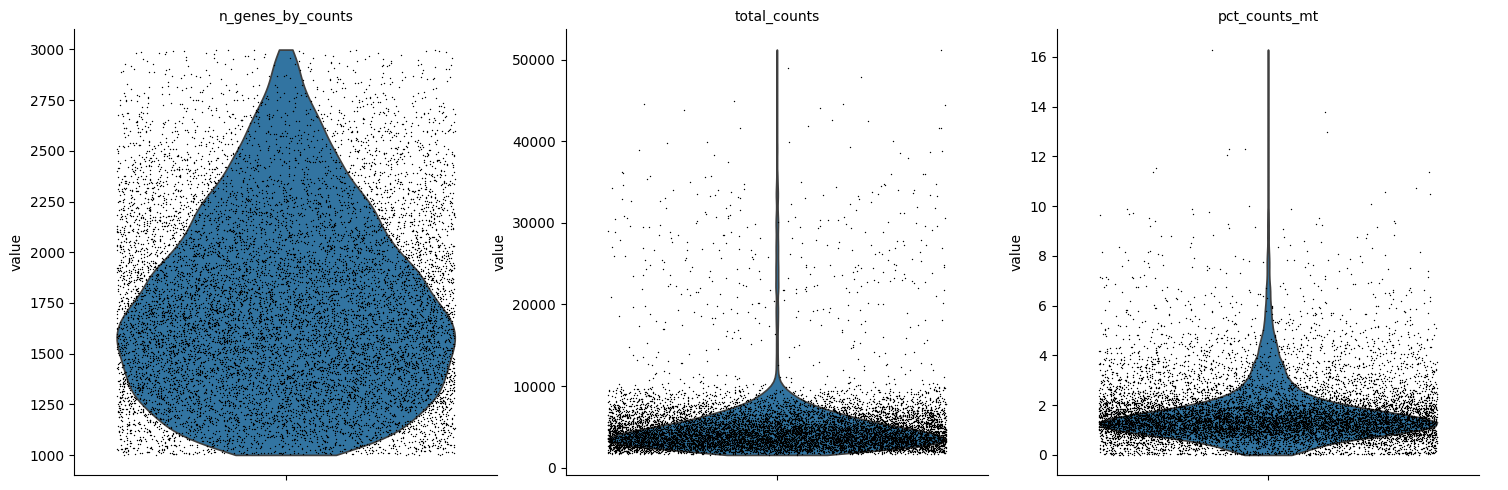

In [59]:
sc.pl.violin(
    adata_ep,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [ ]:
sc.pp.filter_cells(adata_ep, min_genes=100)
sc.pp.filter_genes(adata_ep, min_cells=3)

In [100]:
adata_ep = adata_ep[adata_ep.obs["pct_counts_mt"] <= 10].copy()

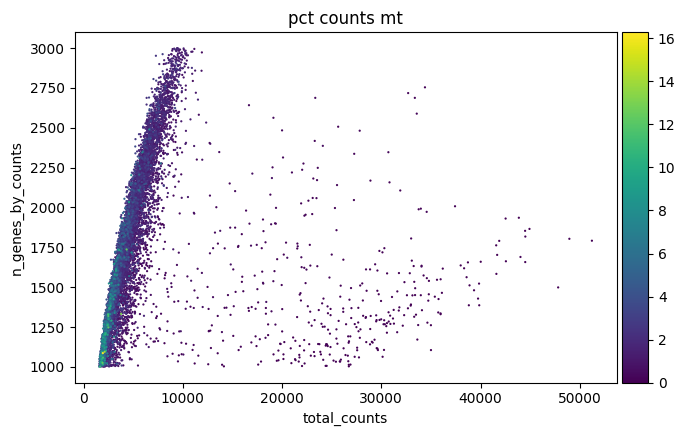

In [61]:
sc.pl.scatter(adata_ep, "total_counts", "n_genes_by_counts", color="pct_counts_mt")


# add meta

In [62]:
meta_ep = pd.read_csv("data/atlas_metadata.txt", sep="\t", index_col=0)
meta_ep

,Mouse,Cluster,nGene,Cell-cycle,Region,Condition
NAME,,,,,,
TYPE,group,group,numeric,numeric,group,group
AAACATTGTTTGGG_M1,M1,Enterocyte.Immature.Distal,1829,-0.18015439,NaN,NaN
AAACCGTGCCAAGT_M1,M1,Tuft,1305,0.065477717,NaN,NaN
AAACGCACAGCCTA_M1,M1,Goblet,2215,-0.292703976,NaN,NaN
AAACGCACCAGATC_M1,M1,Enteroendocrine,2789,-0.332670356,NaN,NaN
...,...,...,...,...,...,...
B10_TTTCACGACAAGCT_Salmonella_TA,Salm_2,TA,1234,-0.0668674247083511,NaN,Salmonella
B10_TTTCAGTGAGGCGA_Salmonella_Enterocyte,Salm_2,Enterocyte,2099,0.151407420185812,NaN,Salmonella
B10_TTTCAGTGCGACAT_Salmonella_Stem,Salm_2,Stem,1596,0.0477913721881939,NaN,Salmonella


In [78]:
meta_ep['Mouse'].value_counts()

Mouse
m1    5967
m2    5698
Name: count, dtype: int64

In [63]:
meta_ep = meta_ep[meta_ep.index.isin(adata_ep.obs.index)]

In [64]:
adata_ep.obs['cell_type'] = meta_ep['Cluster']
adata_ep.obs['batch'] = meta_ep['Mouse']

In [65]:
adata_ep

AnnData object with n_obs × n_vars = 11665 × 27998
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'cell_type', 'batch'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

# [Filter doublet](https://github.com/swolock/scrublet/blob/master/examples/scrublet_basics.ipynb)

In [66]:
import scrublet as scr

In [67]:
# sc.pp.scrublet(adata_ep, batch_key="batch")

In [69]:
#adata_ep[adata_ep.obs['predicted_doublet']==True]

In [ ]:
# scrub = scr.Scrublet(adata_ep, expected_doublet_rate=0.06)
# doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
#                                                           min_cells=3, 
#                                                           min_gene_variability_pctl=85, 
#                                                           n_prin_comps=30)

# scrub.plot_histogram();

: 

# save raw counts

In [70]:
# Saving count data
adata_ep.layers["counts"] = adata_ep.X.copy()

# Normalizing to median total counts
sc.pp.normalize_total(adata_ep)
# Logarithmize the data
sc.pp.log1p(adata_ep)

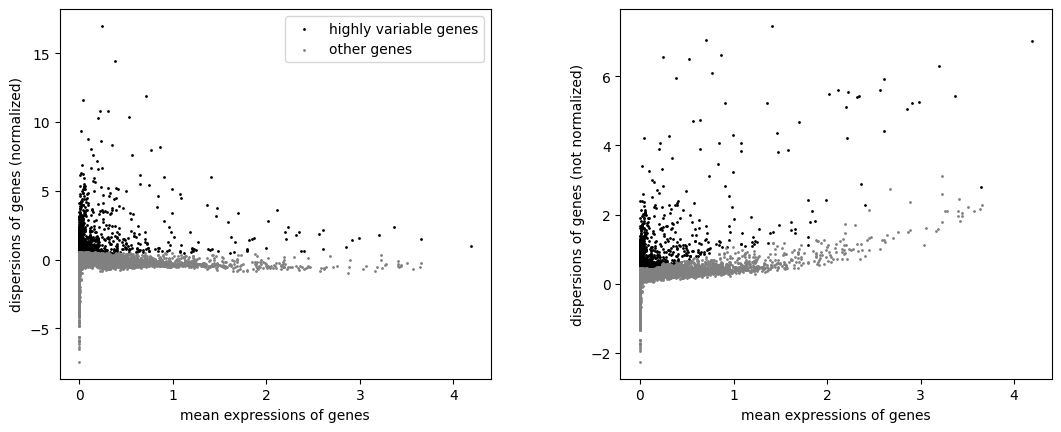

In [71]:
sc.pp.highly_variable_genes(adata_ep, n_top_genes=2000, batch_key="batch")

sc.pl.highly_variable_genes(adata_ep)

# dim red

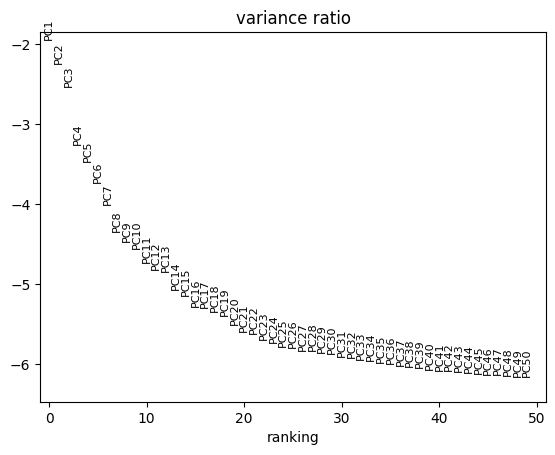

In [72]:
sc.tl.pca(adata_ep)

sc.pl.pca_variance_ratio(adata_ep, n_pcs=50, log=True)



In [74]:
adata_ep

AnnData object with n_obs × n_vars = 11665 × 27998
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'cell_type', 'batch'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

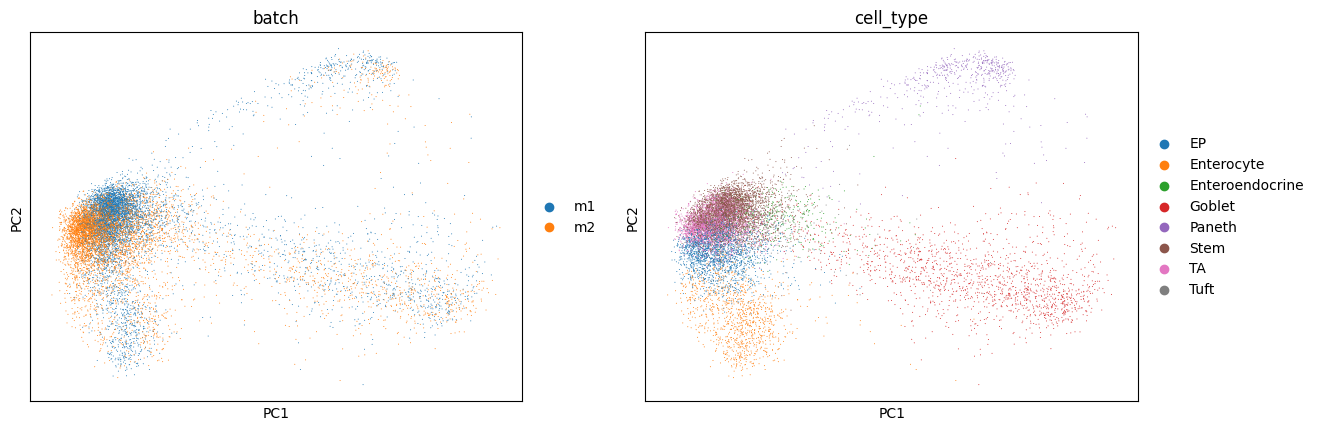

In [76]:
sc.pl.pca(
    adata_ep,
    color=["batch", "cell_type"],
    ncols=2,
    size=2,
)

Nearest neighbor graph construction and visualization#



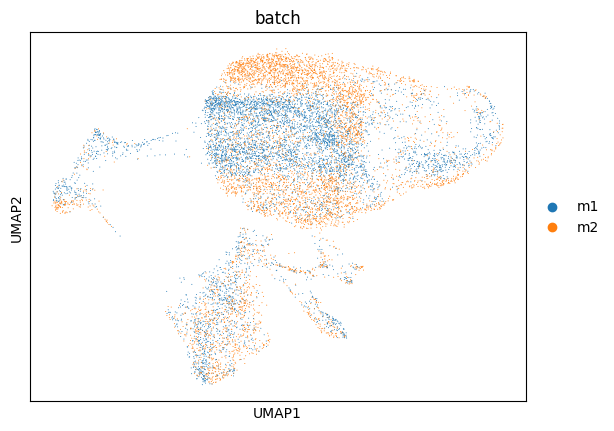

In [82]:
sc.pp.neighbors(adata_ep)
sc.tl.umap(adata_ep)

sc.pl.umap(
    adata_ep,
    color="batch",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

# Preprocess neuron cells

In [85]:
gc_neur.obs

""
M1_S3.GACCAATGTTCTCTAT
M1_S4.ACGATCAAGTGGAAAG
M1_S4.CTGATCCCACAAGCAG
M1_S3.ACGTCCTAGGATTTAG
M1_S4.AGGTTGTAGCACGATG
...
M7_S27.TGGGAGATCTTCCACG
M7_S27.CATAAGCCACTCCGAG
M7_S28.AAGTCGTGTCTTTCAT
M7_S28.TCATATCTCGACACCG


In [89]:
meta = meta[meta['NAME'].isin(gc_neur.obs.index)]

In [92]:
meta['Unique_ID'].value_counts()

Unique_ID
S4     234
S29    158
S3     142
S31    126
S27    104
S30     94
S28     88
Name: count, dtype: int64

In [94]:
meta['Mouse_ID']

146471    M1
146524    M1
146619    M1
146718    M1
146731    M1
          ..
570649    M7
570650    M7
570651    M7
570652    M7
570653    M7
Name: Mouse_ID, Length: 946, dtype: object

In [154]:
meta = pd.read_csv("data/all.meta.txt", sep='\t')
# meta[meta['Dataset'] == "Mouse ileum enteric neurons (10X)"]

cols = ["Annotation", "Mouse_ID", "Unique_ID"]

# make meta one-row-per NAME and index it by NAME
meta2 = (meta.assign(NAME=meta["NAME"].astype(str).str.strip())
            .drop_duplicates("NAME", keep="first")
            .set_index("NAME"))

# align rows to obs and assign
aligned = meta2.reindex(gc_neur.obs_names)[cols]
for c in cols:
    gc_neur.obs[c] = aligned[c]   # overwrites if column already exists

gc_neur.obs[cols].isna().sum()    # sanity check

/var/folders/l_/4y7k2l0d579628286_0qftx00000gn/T/ipykernel_44752/1848978344.py:1: DtypeWarning: Columns (1,4,5,7,9,11,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv("data/all.meta.txt", sep='\t')


Annotation    0
Mouse_ID      0
Unique_ID     0
dtype: int64

In [155]:
gc_neur.obs

,Annotation,Mouse_ID,Unique_ID,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_genes
M1_S3.GACCAATGTTCTCTAT,Neuron_1,M1,S3,2027,7.614805,3977.0,8.288534,14.684436,104.0,4.653960,2.615036,0.0,0.0,0.0,0.0,0.0,0.0,2027
M1_S4.CTGATCCCACAAGCAG,Neuron_1,M1,S4,1307,7.176255,2178.0,7.686621,13.452709,2.0,1.098612,0.091827,0.0,0.0,0.0,0.0,0.0,0.0,1307
M1_S3.ACGTCCTAGGATTTAG,Neuron_1,M1,S3,1572,7.360740,2906.0,7.974877,15.313145,6.0,1.945910,0.206469,0.0,0.0,0.0,0.0,0.0,0.0,1572
M1_S4.AGGTTGTAGCACGATG,Neuron_2,M1,S4,1839,7.517521,3825.0,8.249576,20.758170,173.0,5.159055,4.522876,0.0,0.0,0.0,0.0,0.0,0.0,1839
M1_S3.TCATGTTCATCCGTGG,Neuron_1,M1,S3,1888,7.543803,3936.0,8.278174,19.461382,31.0,3.465736,0.787602,0.0,0.0,0.0,0.0,0.0,0.0,1888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M7_S27.TGGGAGATCTTCCACG,Neuron_1,M7,S27,2546,7.842671,6034.0,8.705331,22.306927,49.0,3.912023,0.812065,0.0,0.0,0.0,0.0,0.0,0.0,2546
M7_S27.CATAAGCCACTCCGAG,Neuron_1,M7,S27,2438,7.799343,5650.0,8.639587,15.345133,12.0,2.564949,0.212389,0.0,0.0,0.0,0.0,0.0,0.0,2438
M7_S28.AAGTCGTGTCTTTCAT,Neuron_1,M7,S28,2122,7.660585,4036.0,8.303257,12.487611,26.0,3.295837,0.644202,0.0,0.0,0.0,0.0,0.0,0.0,2122
M7_S28.TCATATCTCGACACCG,Neuron_1,M7,S28,4077,8.313362,14052.0,9.550591,18.374609,164.0,5.105946,1.167094,0.0,0.0,0.0,0.0,0.0,0.0,4077


In [156]:
gc_neur.obs['Annotation'] 

M1_S3.GACCAATGTTCTCTAT     Neuron_1
M1_S4.CTGATCCCACAAGCAG     Neuron_1
M1_S3.ACGTCCTAGGATTTAG     Neuron_1
M1_S4.AGGTTGTAGCACGATG     Neuron_2
M1_S3.TCATGTTCATCCGTGG     Neuron_1
                             ...   
M7_S27.TGGGAGATCTTCCACG    Neuron_1
M7_S27.CATAAGCCACTCCGAG    Neuron_1
M7_S28.AAGTCGTGTCTTTCAT    Neuron_1
M7_S28.TCATATCTCGACACCG    Neuron_1
M7_S27.TGTGATGAGCCGCACT    Neuron_1
Name: Annotation, Length: 459, dtype: object

In [157]:
gc_neur.var_names_make_unique()
gc_neur.var.index.str.startswith("mt-").sum()
gc_neur.var["mt"] = gc_neur.var_names.str.upper().str.startswith("MT-")
gc_neur.var["mt"].value_counts()


mt
False    13849
True        13
Name: count, dtype: int64

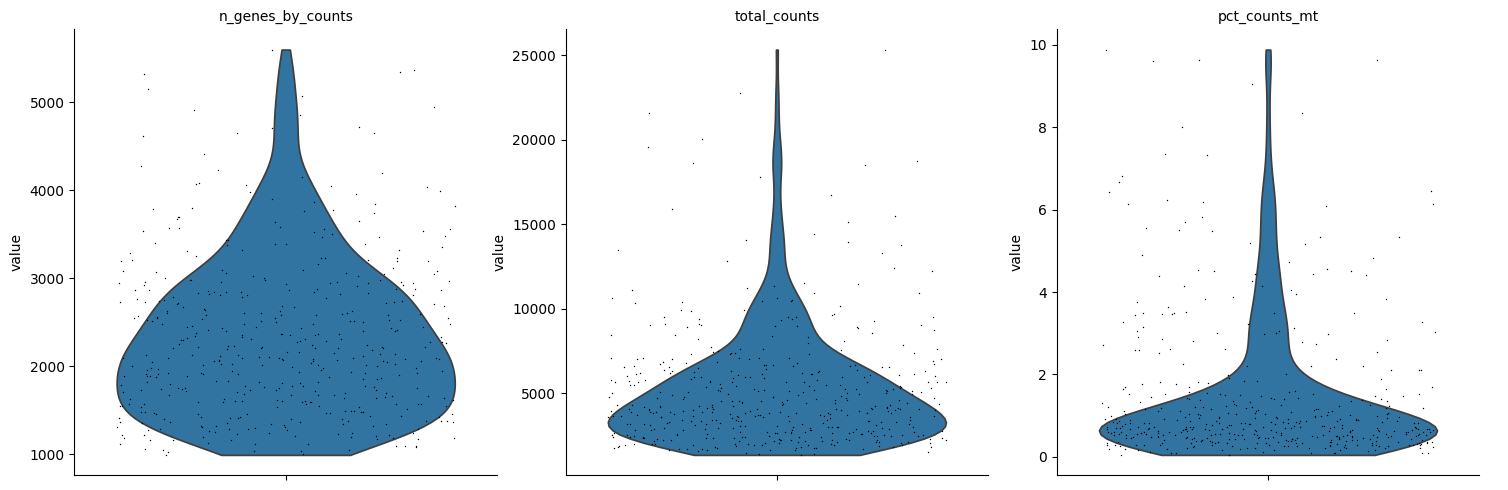

In [158]:

# ribosomal genes
gc_neur.var["ribo"] = gc_neur.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
gc_neur.var["hb"] = gc_neur.var_names.str.contains("^HB[^(P)]")

sc.pp.calculate_qc_metrics(
    gc_neur, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)


sc.pl.violin(
    gc_neur,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)


### filter mt counts > 10%

In [159]:
gc_neur = gc_neur[gc_neur.obs["pct_counts_mt"] <= 10].copy()


In [160]:
gc_neur.obs.index

Index(['M1_S3.GACCAATGTTCTCTAT', 'M1_S4.CTGATCCCACAAGCAG',
       'M1_S3.ACGTCCTAGGATTTAG', 'M1_S4.AGGTTGTAGCACGATG',
       'M1_S3.TCATGTTCATCCGTGG', 'M1_S4.CTAACCCTCTTTGCTA',
       'M1_S3.GGAGATGGTTTACCAG', 'M1_S4.ATGAAAGCACAACGAG',
       'M1_S4.CATTGTTTCCTCAGGG', 'M1_S4.TATTTCGAGTCCTGCG',
       ...
       'M7_S27.ATCGATGAGTCGTCTA', 'M7_S27.TAACTTCCAACGGGTA',
       'M7_S28.TGGAGGAGTTGACTAC', 'M7_S27.AGATGAAAGCTCGTGC',
       'M7_S27.CATAGACTCCGCAACG', 'M7_S27.TGGGAGATCTTCCACG',
       'M7_S27.CATAAGCCACTCCGAG', 'M7_S28.AAGTCGTGTCTTTCAT',
       'M7_S28.TCATATCTCGACACCG', 'M7_S27.TGTGATGAGCCGCACT'],
      dtype='object', length=459)

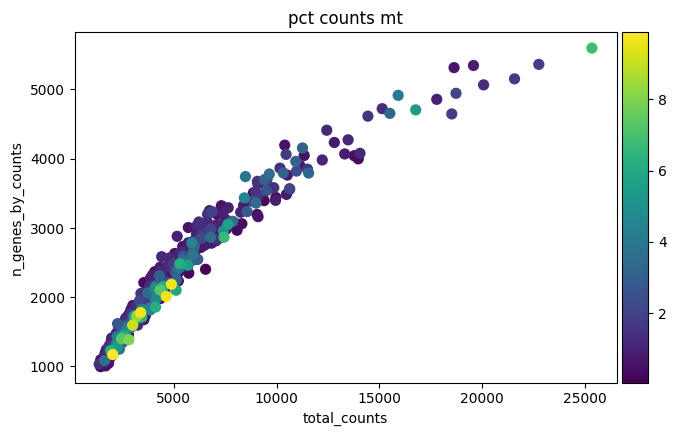

In [161]:

sc.pp.filter_cells(gc_neur, min_genes=100)
sc.pp.filter_genes(gc_neur, min_cells=3)
sc.pl.scatter(gc_neur, "total_counts", "n_genes_by_counts", color="pct_counts_mt")


In [162]:
gc_neur.obs

,Annotation,Mouse_ID,Unique_ID,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_genes
M1_S3.GACCAATGTTCTCTAT,Neuron_1,M1,S3,2027,7.614805,3977.0,8.288534,14.684436,104.0,4.653960,2.615036,0.0,0.0,0.0,0.0,0.0,0.0,2027
M1_S4.CTGATCCCACAAGCAG,Neuron_1,M1,S4,1307,7.176255,2178.0,7.686621,13.452709,2.0,1.098612,0.091827,0.0,0.0,0.0,0.0,0.0,0.0,1307
M1_S3.ACGTCCTAGGATTTAG,Neuron_1,M1,S3,1572,7.360740,2906.0,7.974877,15.313145,6.0,1.945910,0.206469,0.0,0.0,0.0,0.0,0.0,0.0,1572
M1_S4.AGGTTGTAGCACGATG,Neuron_2,M1,S4,1839,7.517521,3825.0,8.249576,20.758170,173.0,5.159055,4.522876,0.0,0.0,0.0,0.0,0.0,0.0,1839
M1_S3.TCATGTTCATCCGTGG,Neuron_1,M1,S3,1888,7.543803,3936.0,8.278174,19.461382,31.0,3.465736,0.787602,0.0,0.0,0.0,0.0,0.0,0.0,1888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M7_S27.TGGGAGATCTTCCACG,Neuron_1,M7,S27,2546,7.842671,6034.0,8.705331,22.306927,49.0,3.912023,0.812065,0.0,0.0,0.0,0.0,0.0,0.0,2546
M7_S27.CATAAGCCACTCCGAG,Neuron_1,M7,S27,2438,7.799343,5650.0,8.639587,15.345133,12.0,2.564949,0.212389,0.0,0.0,0.0,0.0,0.0,0.0,2438
M7_S28.AAGTCGTGTCTTTCAT,Neuron_1,M7,S28,2122,7.660585,4036.0,8.303257,12.487611,26.0,3.295837,0.644202,0.0,0.0,0.0,0.0,0.0,0.0,2122
M7_S28.TCATATCTCGACACCG,Neuron_1,M7,S28,4077,8.313362,14052.0,9.550591,18.374609,164.0,5.105946,1.167094,0.0,0.0,0.0,0.0,0.0,0.0,4077


In [165]:
sc.pp.scrublet(gc_neur, batch_key="Mouse_ID")

In [166]:
gc_neur[gc_neur.obs['predicted_doublet']==True]

View of AnnData object with n_obs × n_vars = 16 × 13862
    obs: 'Annotation', 'Mouse_ID', 'Unique_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'scrublet'

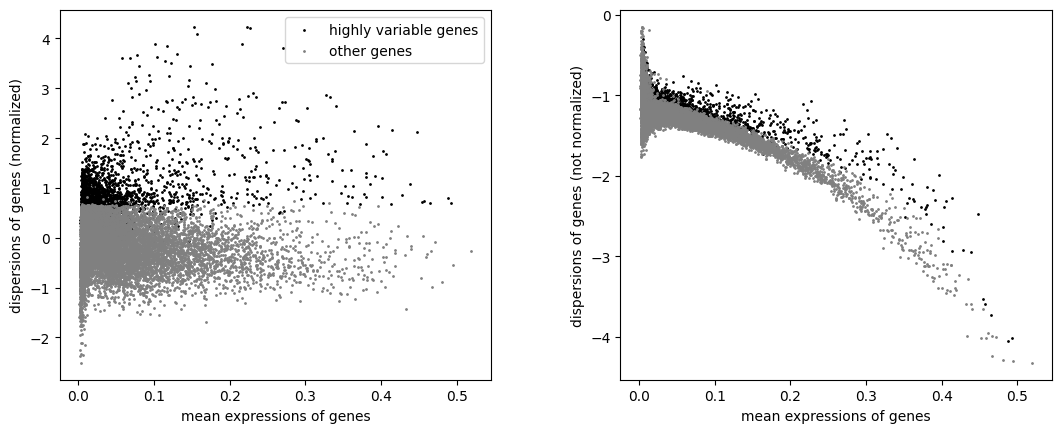

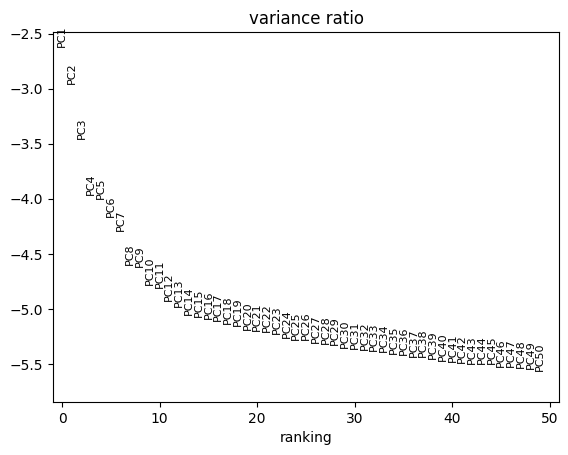

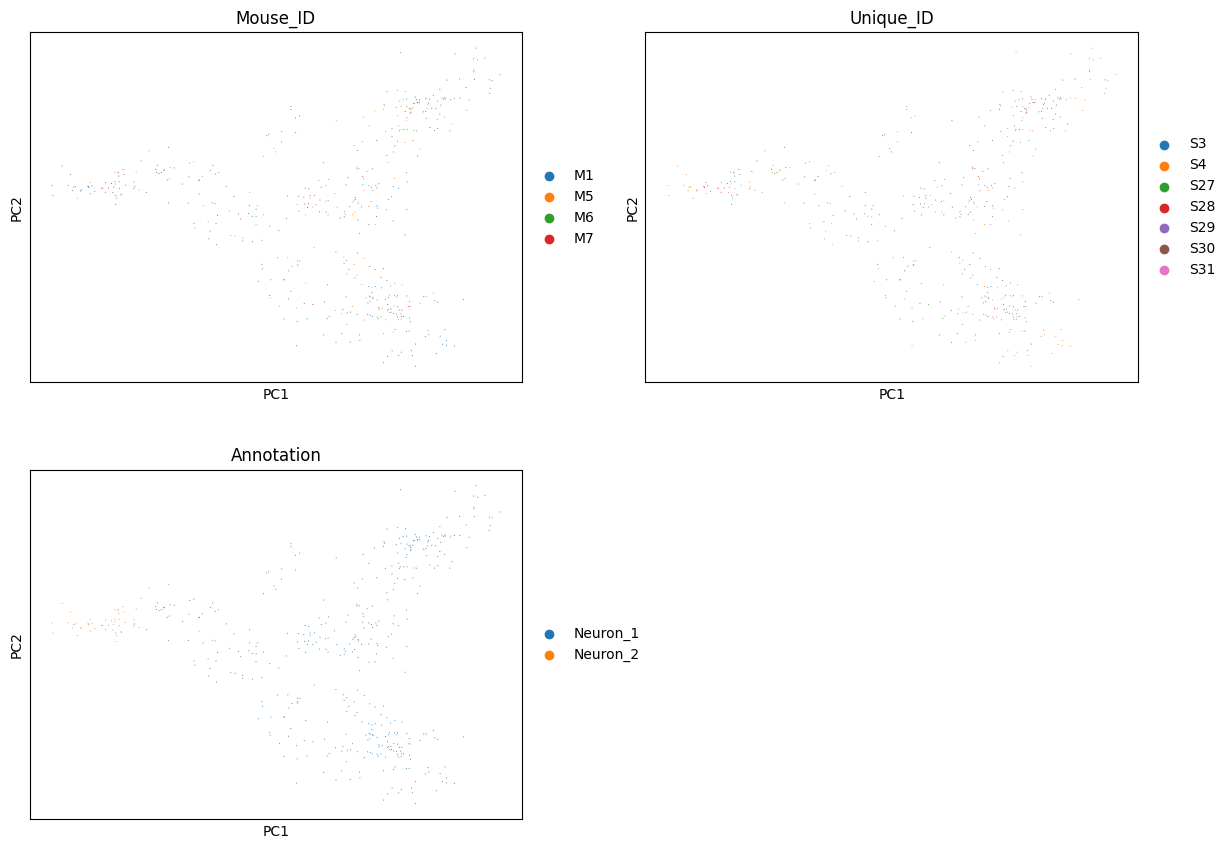

In [171]:
# Saving count data
gc_neur.layers["counts"] = gc_neur.X.copy()

# Normalizing to median total counts
sc.pp.normalize_total(gc_neur)
# Logarithmize the data
sc.pp.log1p(gc_neur)

sc.pp.highly_variable_genes(gc_neur, n_top_genes=2000, batch_key="Mouse_ID")

sc.pl.highly_variable_genes(gc_neur)


sc.tl.pca(gc_neur)

sc.pl.pca_variance_ratio(gc_neur, n_pcs=50, log=True)



sc.pl.pca(
    gc_neur,
    color=["Mouse_ID", "Unique_ID", "Annotation"],
    ncols=2,
    size=2,
)


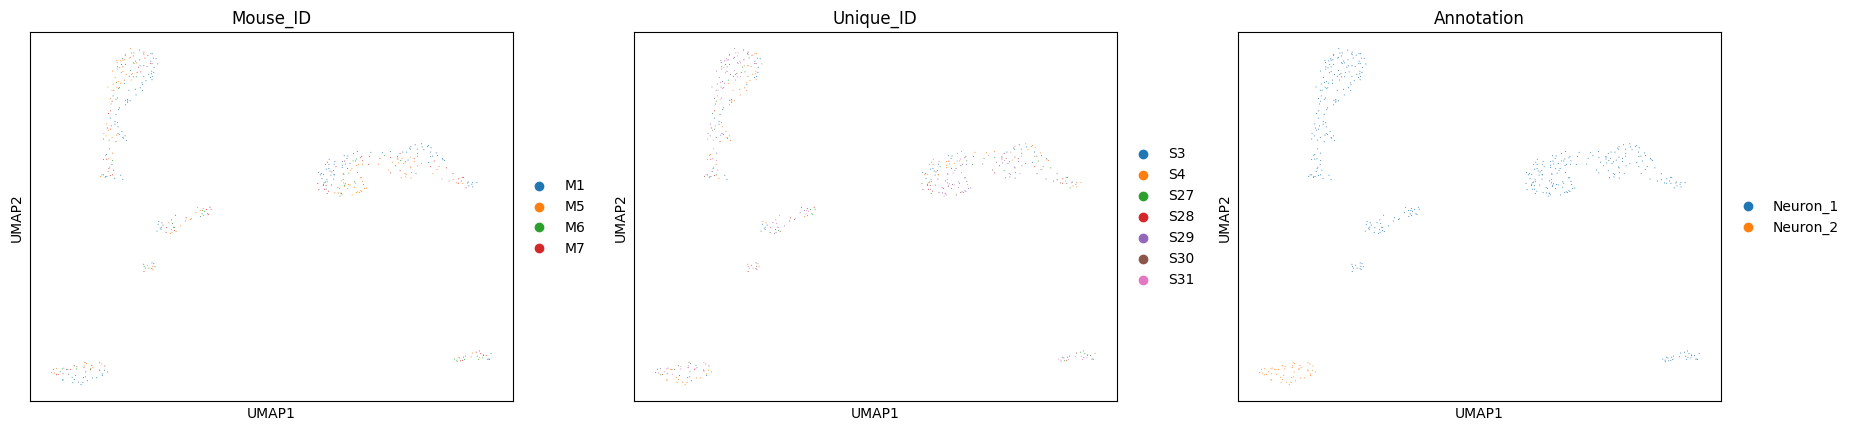

In [ ]:
sc.pp.neighbors(gc_neur)
sc.tl.umap(gc_neur)

sc.pl.umap(
    gc_neur,
    color=["Mouse_ID", "Unique_ID", "Annotation"],
    # Setting a smaller point size to get prevent overlap
    size=2,
)

In [174]:
gc_neur

AnnData object with n_obs × n_vars = 459 × 13862
    obs: 'Annotation', 'Mouse_ID', 'Unique_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'Mouse_ID_colors', 'Unique_ID_colors', 'Annotation_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [179]:
adata_ep.obs['Mouse_ID'] = adata_ep.obs['batch']

In [181]:
adata_ep.var

,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
GENE,,,,,,,,,,,,,,,
Xkr4,False,False,False,5,0.000252,0.000252,99.957137,2.936379,1.370261,False,0.000273,-0.197247,0.373044,1,False
Gm1992,False,False,False,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,0.000000,0.000000,0.000000,0,False
Gm37381,False,False,False,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,0.000000,0.000000,0.000000,0,False
Rp1,False,False,False,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,0.000000,0.000000,0.000000,0,False
Rp1_ENSMUSG00000109048,False,False,False,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,0.000000,0.000000,0.000000,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC168977.1,False,False,False,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,0.000000,0.000000,0.000000,0,False
PISD,False,False,False,2962,0.197172,0.179962,74.607801,2300.012451,7.741105,False,0.135695,-0.692321,0.078518,0,False
DHRSX,False,False,False,3227,0.212292,0.192513,72.336048,2476.382324,7.814958,False,0.148230,-0.709652,0.207686,0,False


In [180]:
gc_neur.var

,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
GENE,,,,,,,,,,,,,,,,
0610007P14Rik,False,False,False,40,0.089325,0.085558,91.285403,41.0,3.737670,40,False,0.025781,-1.214503,0.215070,0,False
0610009B22Rik,False,False,False,11,0.023965,0.023682,97.603486,11.0,2.484907,11,False,0.007060,-1.366011,-0.669351,0,False
0610009O20Rik,False,False,False,43,0.106754,0.101431,90.631808,49.0,3.912023,43,False,0.027133,-1.298911,-0.439584,0,False
0610010F05Rik,False,False,False,144,0.409586,0.343296,68.627451,188.0,5.241747,144,False,0.100892,-1.386959,0.025721,0,False
0610012G03Rik,False,False,False,23,0.050109,0.048894,94.989107,23.0,3.178054,23,False,0.015288,-1.150161,0.331954,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Nd3,True,False,False,233,1.520697,0.924536,49.237473,698.0,6.549651,233,True,0.189040,-1.634150,0.855493,2,False
mt-Nd4,True,False,False,283,4.087146,1.626717,38.344227,1876.0,7.537430,283,True,0.241136,-1.730913,0.788429,2,False
mt-Nd4l,True,False,False,129,0.718954,0.541716,71.895425,330.0,5.802118,129,False,0.090265,-1.326068,0.047116,0,False


# pick genes that interscect 

In [182]:
genes = gc_neur.var_names.intersection(adata_ep.var_names)
gc_neur = gc_neur[:, genes].copy()
adata_ep = adata_ep[:, genes].copy()

In [ ]:
adata = gc_neur.concatenate(adata_ep, batch_key="dataset", batch_categories=["gc_neur","adata_ep"])

/var/folders/l_/4y7k2l0d579628286_0qftx00000gn/T/ipykernel_44752/2334426142.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = gc_neur.concatenate(adata_ep, batch_key="dataset", batch_categories=["gc_neur","adata_ep"])


In [184]:
adata

AnnData object with n_obs × n_vars = 12124 × 13862
    obs: 'Annotation', 'Mouse_ID', 'Unique_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'cell_type', 'batch', 'dataset'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts-adata_ep', 'mean_counts-adata_ep', 'log1p_mean_counts-adata_ep', 'pct_dropout_by_counts-adata_ep', 'total_counts-adata_ep', 'log1p_total_counts-adata_ep', 'highly_variable-adata_ep', 'means-adata_ep', 'dispersions-adata_ep', 'dispersions_norm-adata_ep', 'highly_variable_nbatches-adata_ep', 'highly_variable_intersection-adata_ep', 'n_cells_by_counts-gc_neur', 'mean_counts-gc_neur', 'log1p_mean_counts-gc_neur', 'pct_dropout_by_counts-gc_neur', 'total_counts-gc_neur

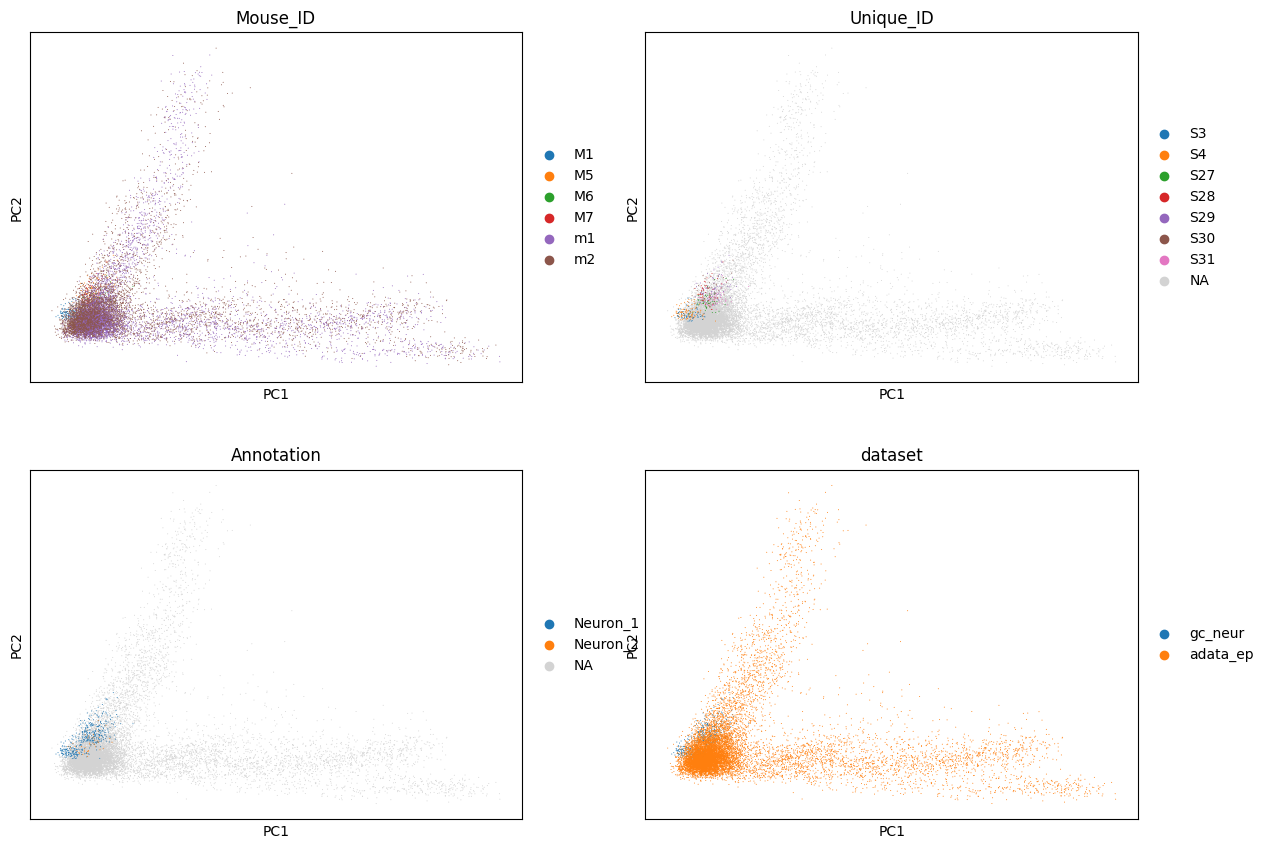

In [185]:
sc.pp.highly_variable_genes(adata, batch_key="batch")

# scale combined object 

sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver="arpack")

sc.pl.pca(
    adata,
    color=["Mouse_ID", "Unique_ID", "Annotation", "dataset"],
    ncols=2,
    size=2,
)
# Harmony-corrected PCs are in `adata.obsm["X_pca_harmony"]`

In [197]:
adata.obs['dataset'].value_counts()

dataset
adata_ep    11665
gc_neur       459
Name: count, dtype: int64

In [ ]:
sc.pp.harmony_integrate(adata, key="batch")

In [199]:
adata.obs.head()

,Annotation,Mouse_ID,Unique_ID,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,...,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_genes,doublet_score,predicted_doublet,cell_type,batch,dataset
M1_S3.GACCAATGTTCTCTAT-gc_neur,Neuron_1,M1,S3,2027,7.614805,3977.0,8.288534,14.684436,104.0,4.653960,...,0.0,0.0,0.0,0.0,2021.0,0.027907,False,NaN,NaN,gc_neur
M1_S4.CTGATCCCACAAGCAG-gc_neur,Neuron_1,M1,S4,1307,7.176255,2178.0,7.686621,13.452709,2.0,1.098612,...,0.0,0.0,0.0,0.0,1299.0,0.023555,False,NaN,NaN,gc_neur
M1_S3.ACGTCCTAGGATTTAG-gc_neur,Neuron_1,M1,S3,1572,7.360740,2906.0,7.974877,15.313145,6.0,1.945910,...,0.0,0.0,0.0,0.0,1560.0,0.023555,False,NaN,NaN,gc_neur
M1_S4.AGGTTGTAGCACGATG-gc_neur,Neuron_2,M1,S4,1839,7.517521,3825.0,8.249576,20.758170,173.0,5.159055,...,0.0,0.0,0.0,0.0,1821.0,0.013841,False,NaN,NaN,gc_neur
M1_S3.TCATGTTCATCCGTGG-gc_neur,Neuron_1,M1,S3,1888,7.543803,3936.0,8.278174,19.461382,31.0,3.465736,...,0.0,0.0,0.0,0.0,1872.0,0.027907,False,NaN,NaN,gc_neur


In [203]:
# copy initial pca for comparison

adata.obsm['X_pca_initial'] = adata.obsm['X_pca'].copy()

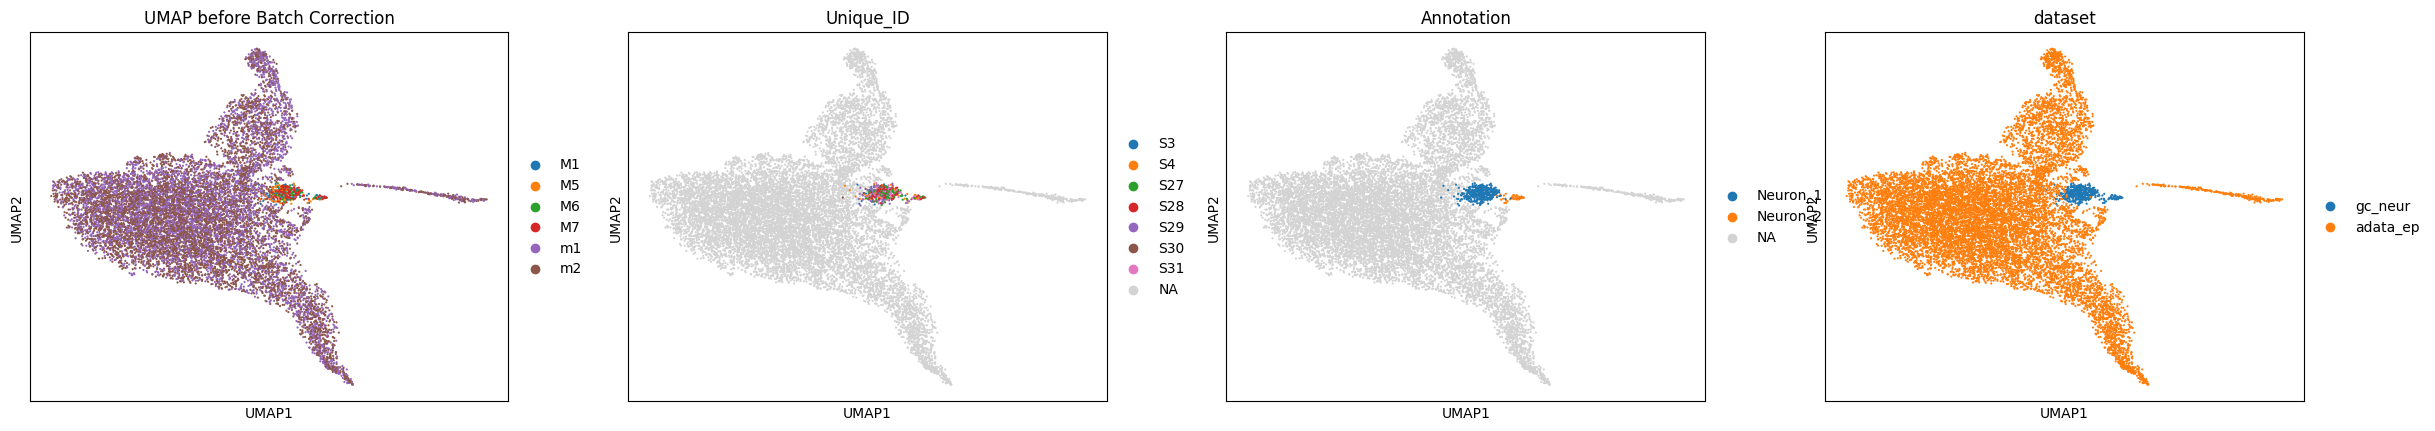

In [205]:
sc.pp.neighbors(adata, n_pcs=50, use_rep='X_pca_initial')
sc.tl.umap(adata)
sc.pl.umap(adata, color=["Mouse_ID", "Unique_ID", "Annotation", "dataset"], title="UMAP before Batch Correction")

adata.obsm['X_umap_preharmony'] = adata.obsm['X_umap'].copy()


In [221]:
import scanpy.external as sce

sce.pp.harmony_integrate(adata, ['Mouse_ID', 'dataset'])

2025-09-26 00:44:18,737 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


2025-09-26 00:44:19,729 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-09-26 00:44:19,755 - harmonypy - INFO - Iteration 1 of 10
2025-09-26 00:44:20,733 - harmonypy - INFO - Iteration 2 of 10
2025-09-26 00:44:21,640 - harmonypy - INFO - Iteration 3 of 10
2025-09-26 00:44:22,540 - harmonypy - INFO - Iteration 4 of 10
2025-09-26 00:44:23,174 - harmonypy - INFO - Iteration 5 of 10
2025-09-26 00:44:24,063 - harmonypy - INFO - Iteration 6 of 10
2025-09-26 00:44:24,416 - harmonypy - INFO - Iteration 7 of 10
2025-09-26 00:44:24,724 - harmonypy - INFO - Iteration 8 of 10
2025-09-26 00:44:25,041 - harmonypy - INFO - Iteration 9 of 10
2025-09-26 00:44:25,355 - harmonypy - INFO - Iteration 10 of 10
2025-09-26 00:44:25,863 - harmonypy - INFO - Stopped before convergence


In [222]:
adata

AnnData object with n_obs × n_vars = 12124 × 13862
    obs: 'Annotation', 'Mouse_ID', 'Unique_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'cell_type', 'batch', 'dataset'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts-adata_ep', 'mean_counts-adata_ep', 'log1p_mean_counts-adata_ep', 'pct_dropout_by_counts-adata_ep', 'total_counts-adata_ep', 'log1p_total_counts-adata_ep', 'highly_variable-adata_ep', 'means-adata_ep', 'dispersions-adata_ep', 'dispersions_norm-adata_ep', 'highly_variable_nbatches-adata_ep', 'highly_variable_intersection-adata_ep', 'n_cells_by_counts-gc_neur', 'mean_counts-gc_neur', 'log1p_mean_counts-gc_neur', 'pct_dropout_by_counts-gc_neur', 'total_counts-gc_neur

In [223]:
sc.pp.neighbors(adata, use_rep='X_pca_harmony', key_added='neighbors_harmony', n_pcs=40, random_state=42)
sc.tl.umap(adata, neighbors_key='neighbors_harmony', random_state=42)
adata.obsm['X_umap_harmony']  = adata.obsm['X_umap'].copy()

/Users/sofialuk/Desktop/hack_team_7/.venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


[<Axes: title={'center': 'After: Mouse_ID'}, xlabel='umap_harmony1', ylabel='umap_harmony2'>,
 <Axes: title={'center': 'After: batch'}, xlabel='umap_harmony1', ylabel='umap_harmony2'>]

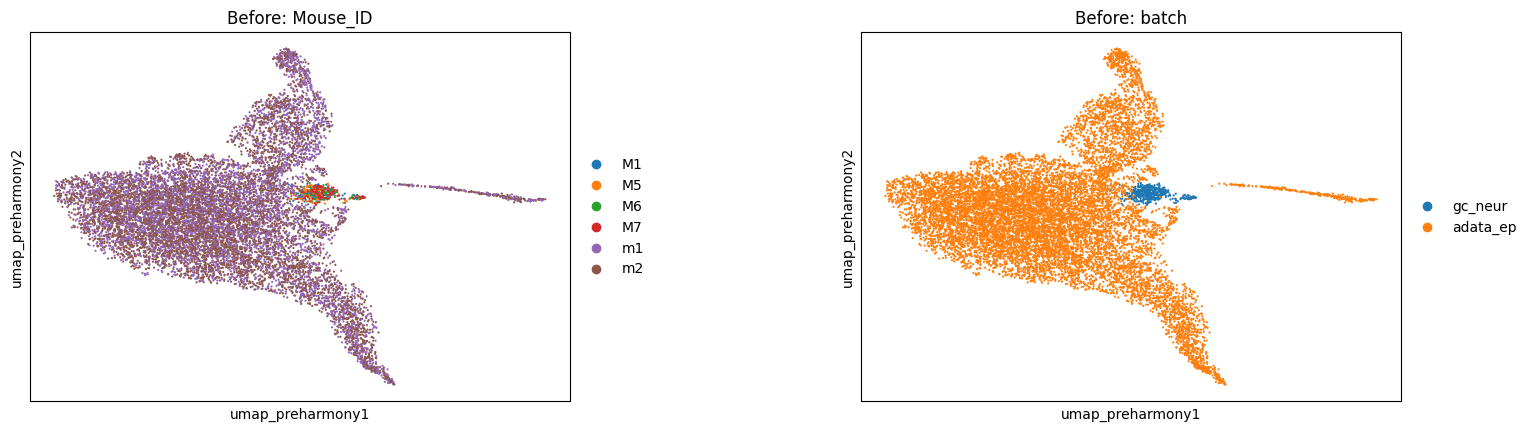

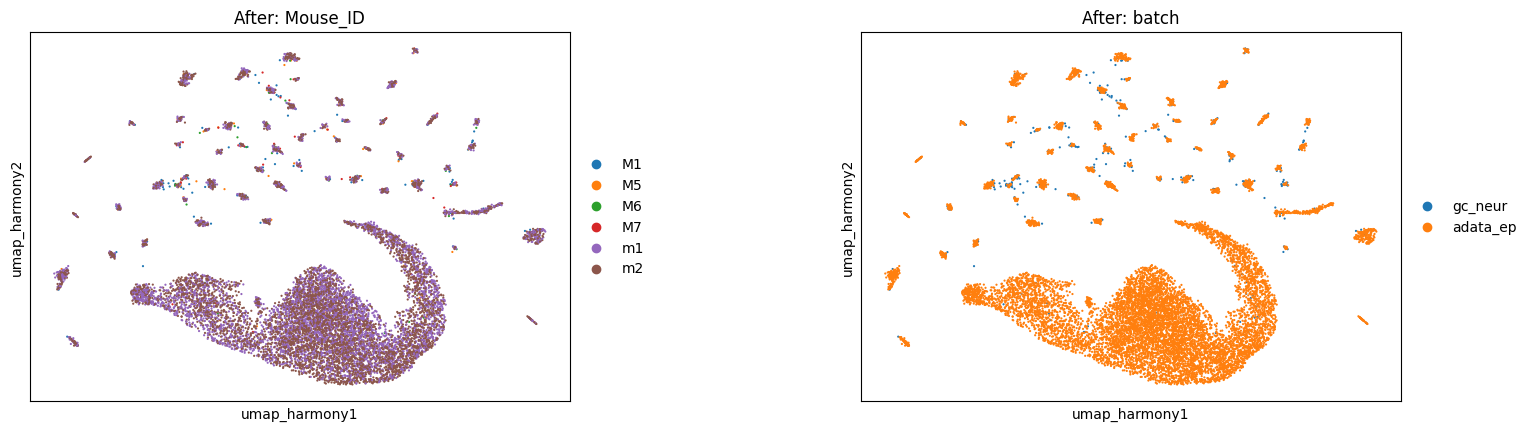

In [224]:
# Before
sc.pl.embedding(
    adata,
    basis="umap_preharmony",
    color=["Mouse_ID",  "dataset"],
    ncols=3,          # 1 row, 3 columns
    show=False,
    wspace=0.4,
    title=["Before: Mouse_ID", "Before: batch", "Before: dataset"],
)

# After
sc.pl.embedding(
    adata,
    basis="umap_harmony",
    color=["Mouse_ID", "dataset"],
    ncols=3,
    show=False,
    wspace=0.4,
    title=["After: Mouse_ID", "After: batch", "After: dataset"],
)


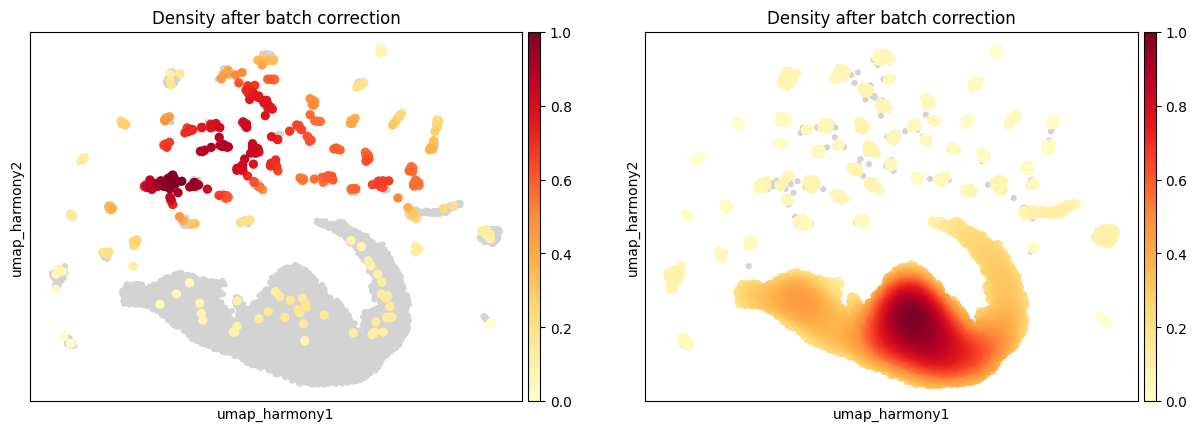

In [230]:
sc.tl.embedding_density(adata,
                        basis='umap_harmony',
                        groupby='dataset', 
                        key_added='density_X_umap_harmony_sample')

sc.pl.embedding_density(adata,
                        basis='umap_harmony',
                        key='density_X_umap_harmony_sample',
                        title="Density after batch correction") 

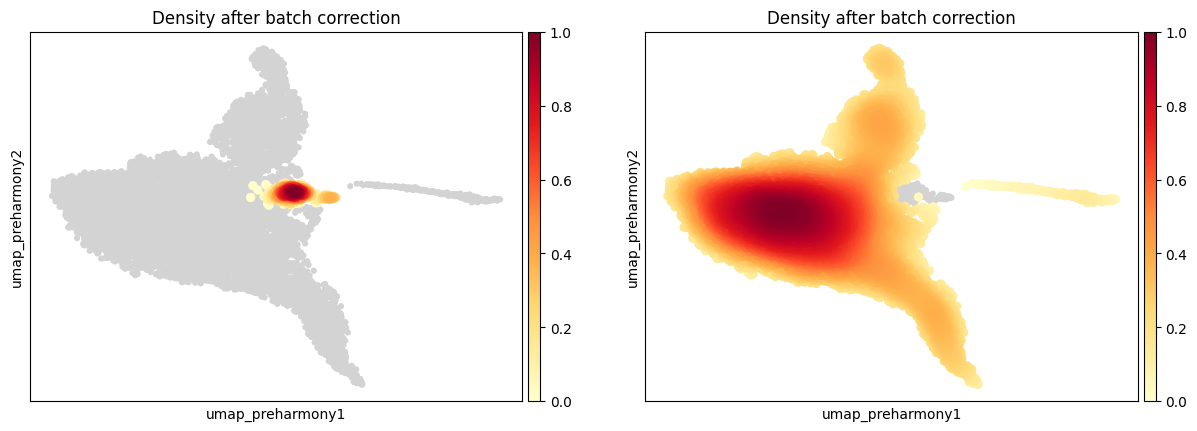

In [231]:
sc.tl.embedding_density(adata,
                        basis='umap_preharmony',
                        groupby='dataset', 
                        key_added='density_X_umap_preharmony_sample')

sc.pl.embedding_density(adata,
                        basis='umap_preharmony',
                        key='density_X_umap_preharmony_sample',
                        title="Density after batch correction") 

# BC version 2: to not over correct

In [232]:
sc.pp.combat(gc_neur, key="Mouse_ID")
sc.pp.combat(adata_ep, key="batch")  # batch here is per-m

/Users/sofialuk/Desktop/hack_team_7/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_combat.py:351: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


Found 1253 genes with zero variance.


/Users/sofialuk/Desktop/hack_team_7/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_combat.py:351: RuntimeWarning: invalid value encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()
/Users/sofialuk/Desktop/hack_team_7/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_combat.py:351: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


In [233]:
adata_corr = gc_neur.concatenate(adata_ep, join="inner", batch_key="dataset")


/var/folders/l_/4y7k2l0d579628286_0qftx00000gn/T/ipykernel_44752/637733431.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_corr = gc_neur.concatenate(adata_ep, join="inner", batch_key="dataset")


In [234]:
sc.pp.pca(adata_corr)

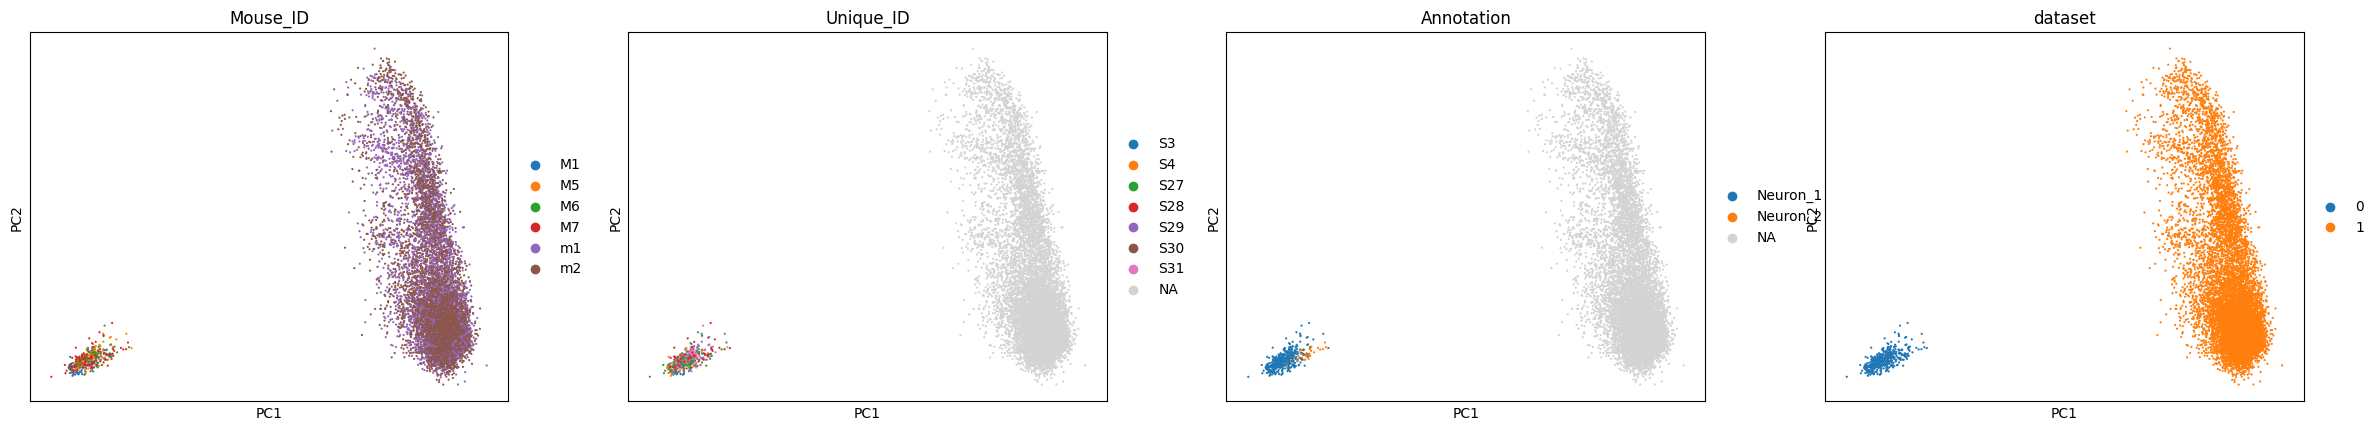

In [235]:
sc.pl.pca(
    adata_corr,
    color=["Mouse_ID", "Unique_ID", "Annotation", "dataset"])